# Gredient Boosting Machine

분류(Classification)과 분류(Regression)에 둘 다 사용할 수 있다.
AdaBoost와 같이 순차적(Sequentially)으로 이전의 오류들을 찾아가며 여러개의 weak model들을 만든다.

하지만, 가중치(Weight)를 조정하는 Adaboost와 다르게 잔차(Residual)를 최소화 하는데 초점을 맞춘다.

파생형으로 XGBoost, LightGBM, CatBoost 등이 있다.





### 1. 잔차(Residual)란,

Residual = (actual value - predicted value)

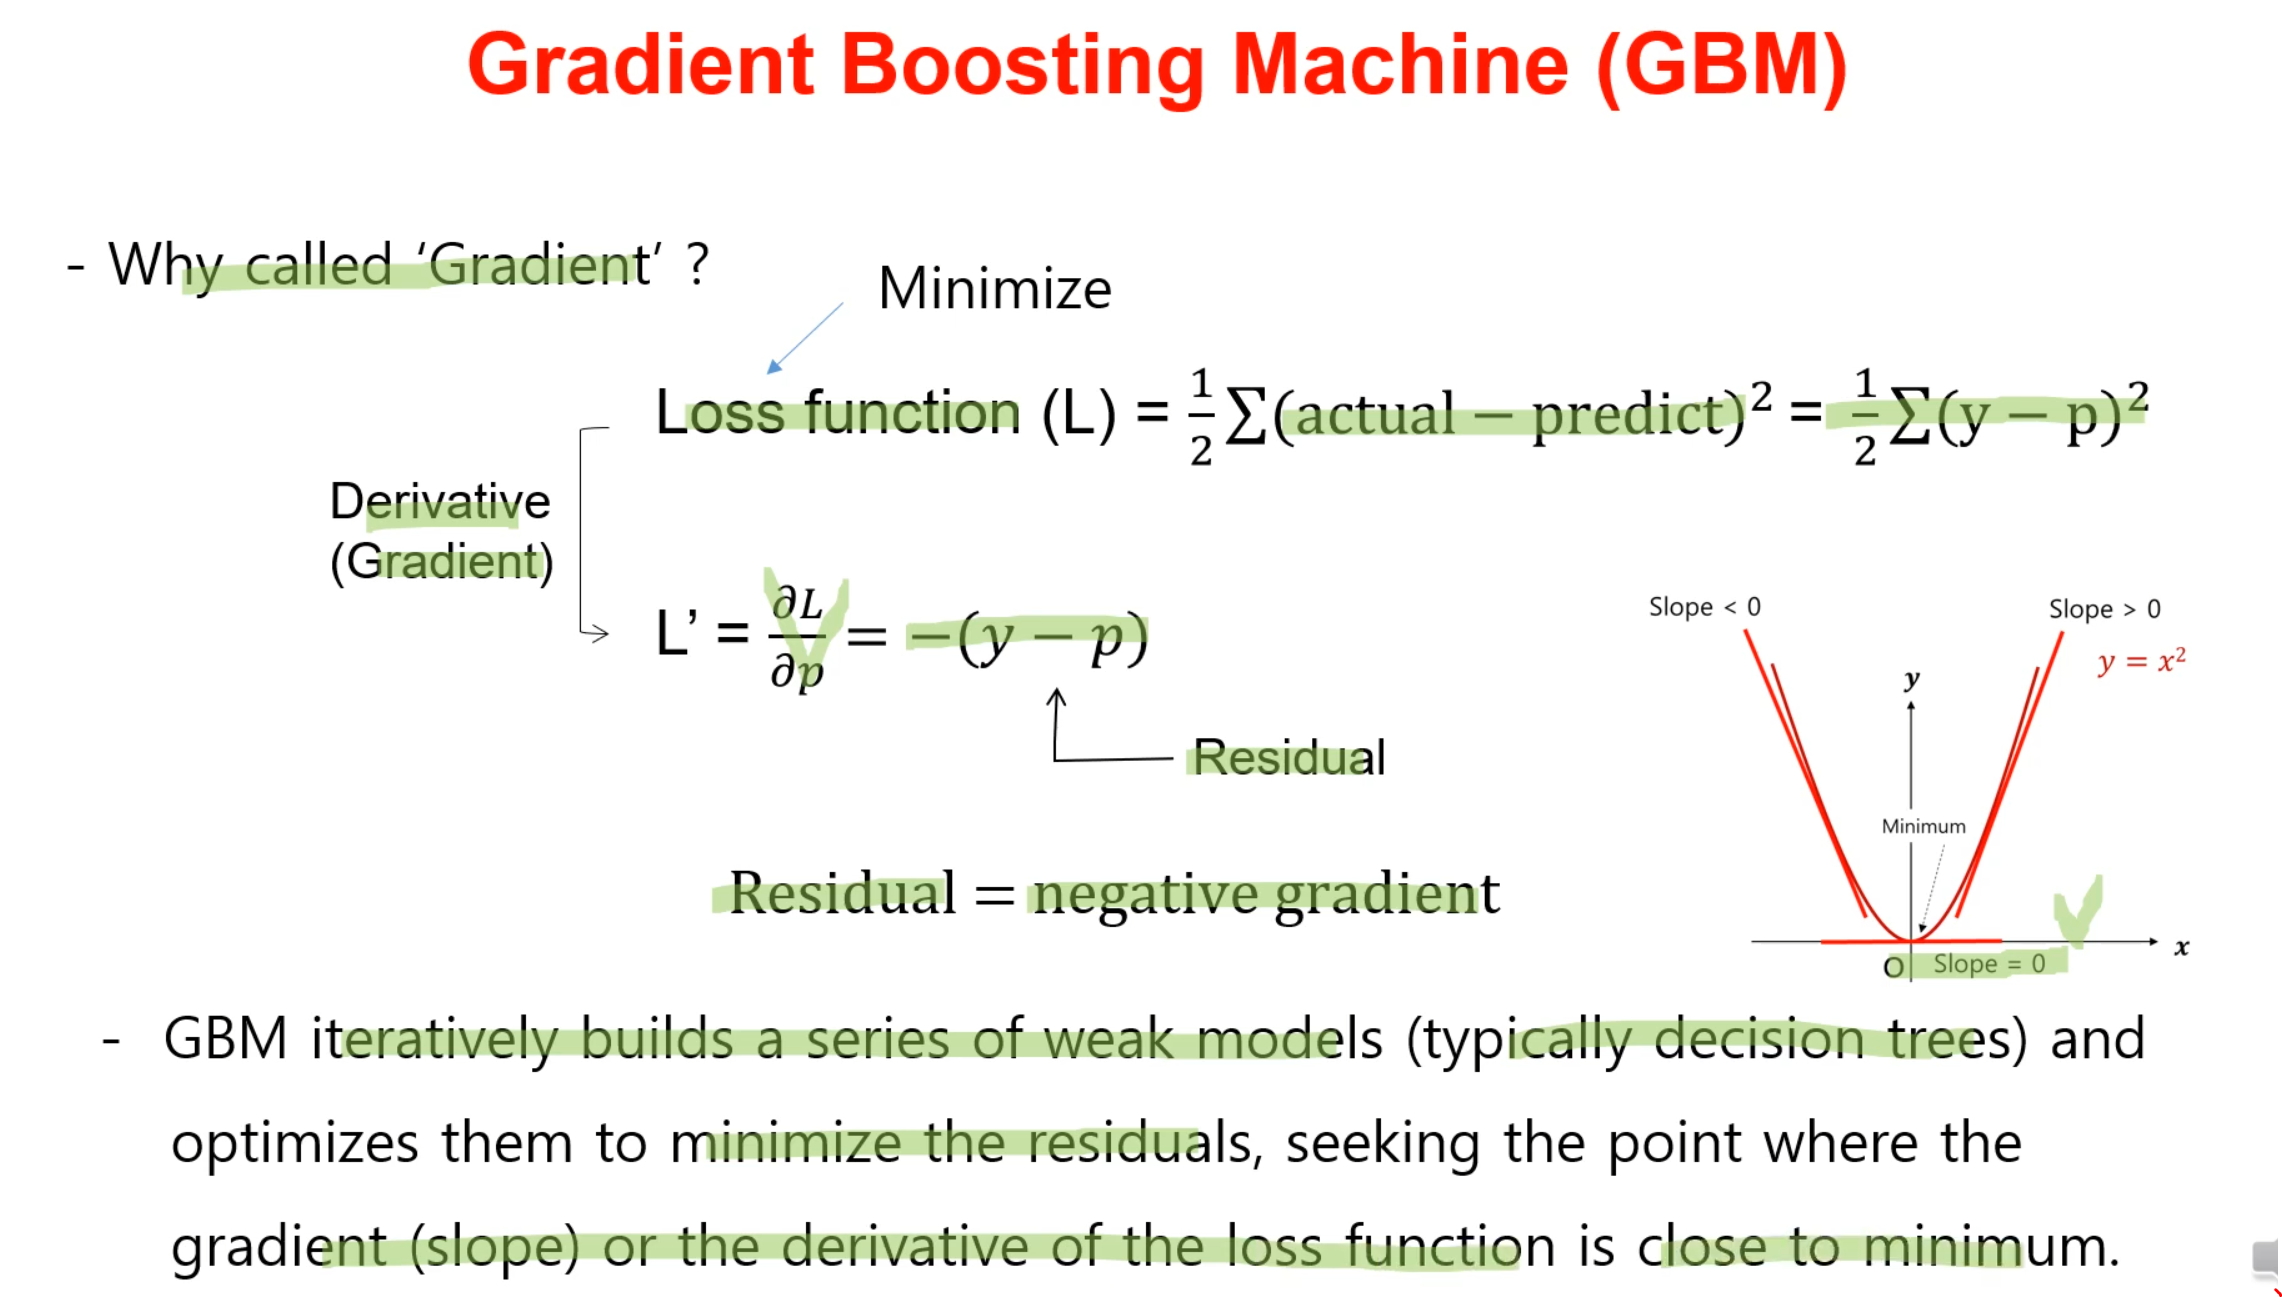

- Lossfunction(손실 함수): 예측 값과 실제값의 차이의 제곱의 합으로 이루어져 있다.

- L' : 예측 값에 대하여 미분한 값

- -( y - p) : 잔차를 의미한다.

- 잔차(Residual)는 마이너스 기울기를 의미하고, 결론적으로 기울기가 0이되는 지점을 찾는 것이다.

### 2. 작동 방식



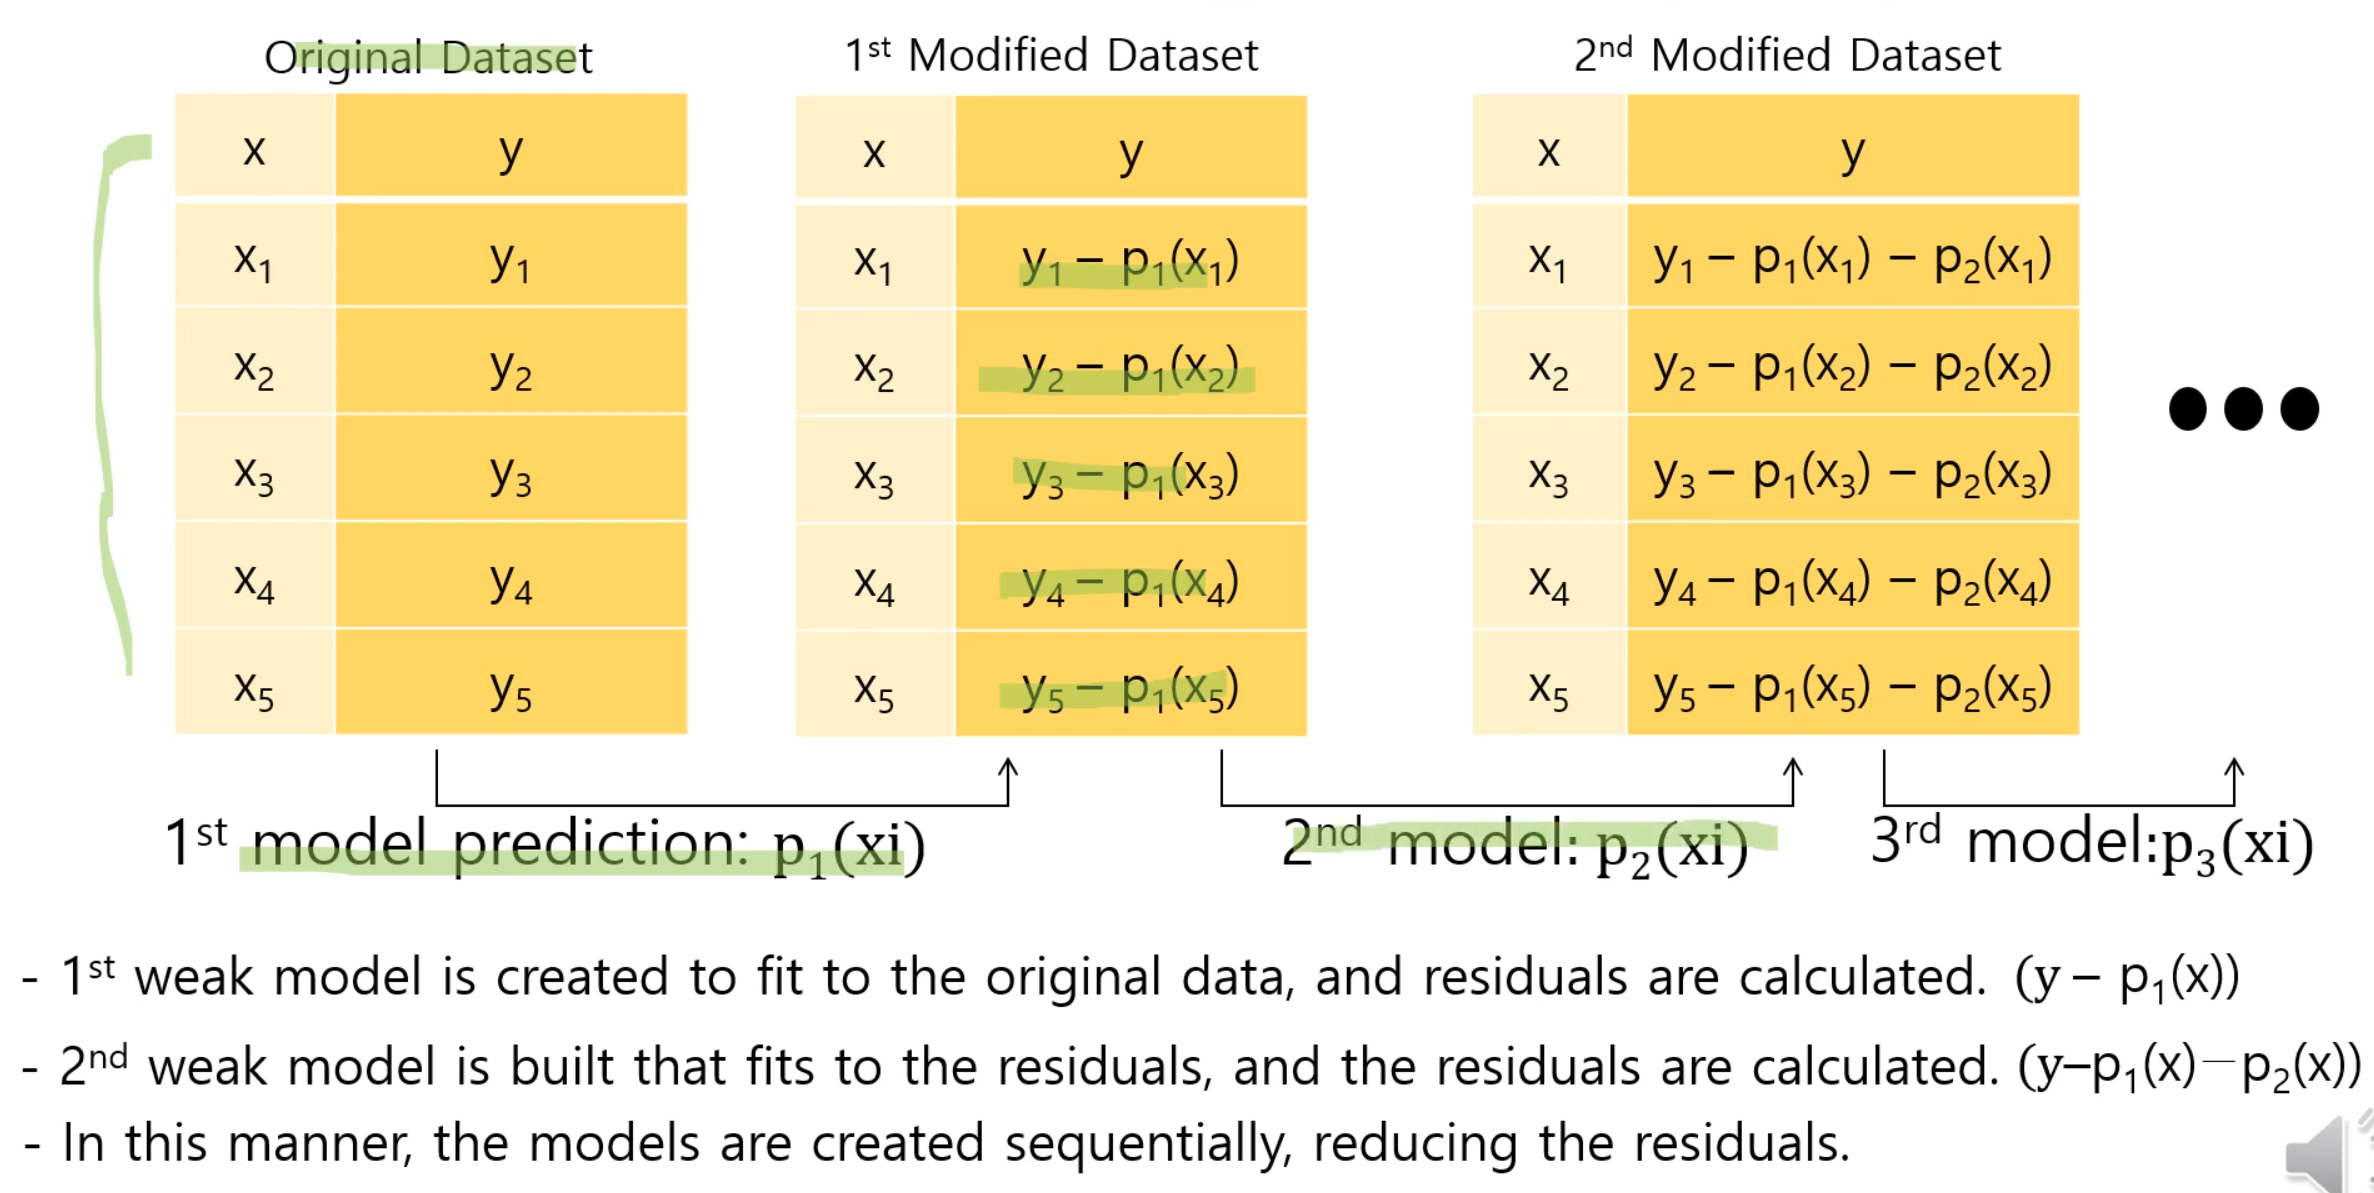

모델들이 순차적으로 생성되면서 잔차 P를 계속 빼주기 때문에, 잔차는 계속 줄어들게 된다.

### 3. 작동 방식 예제



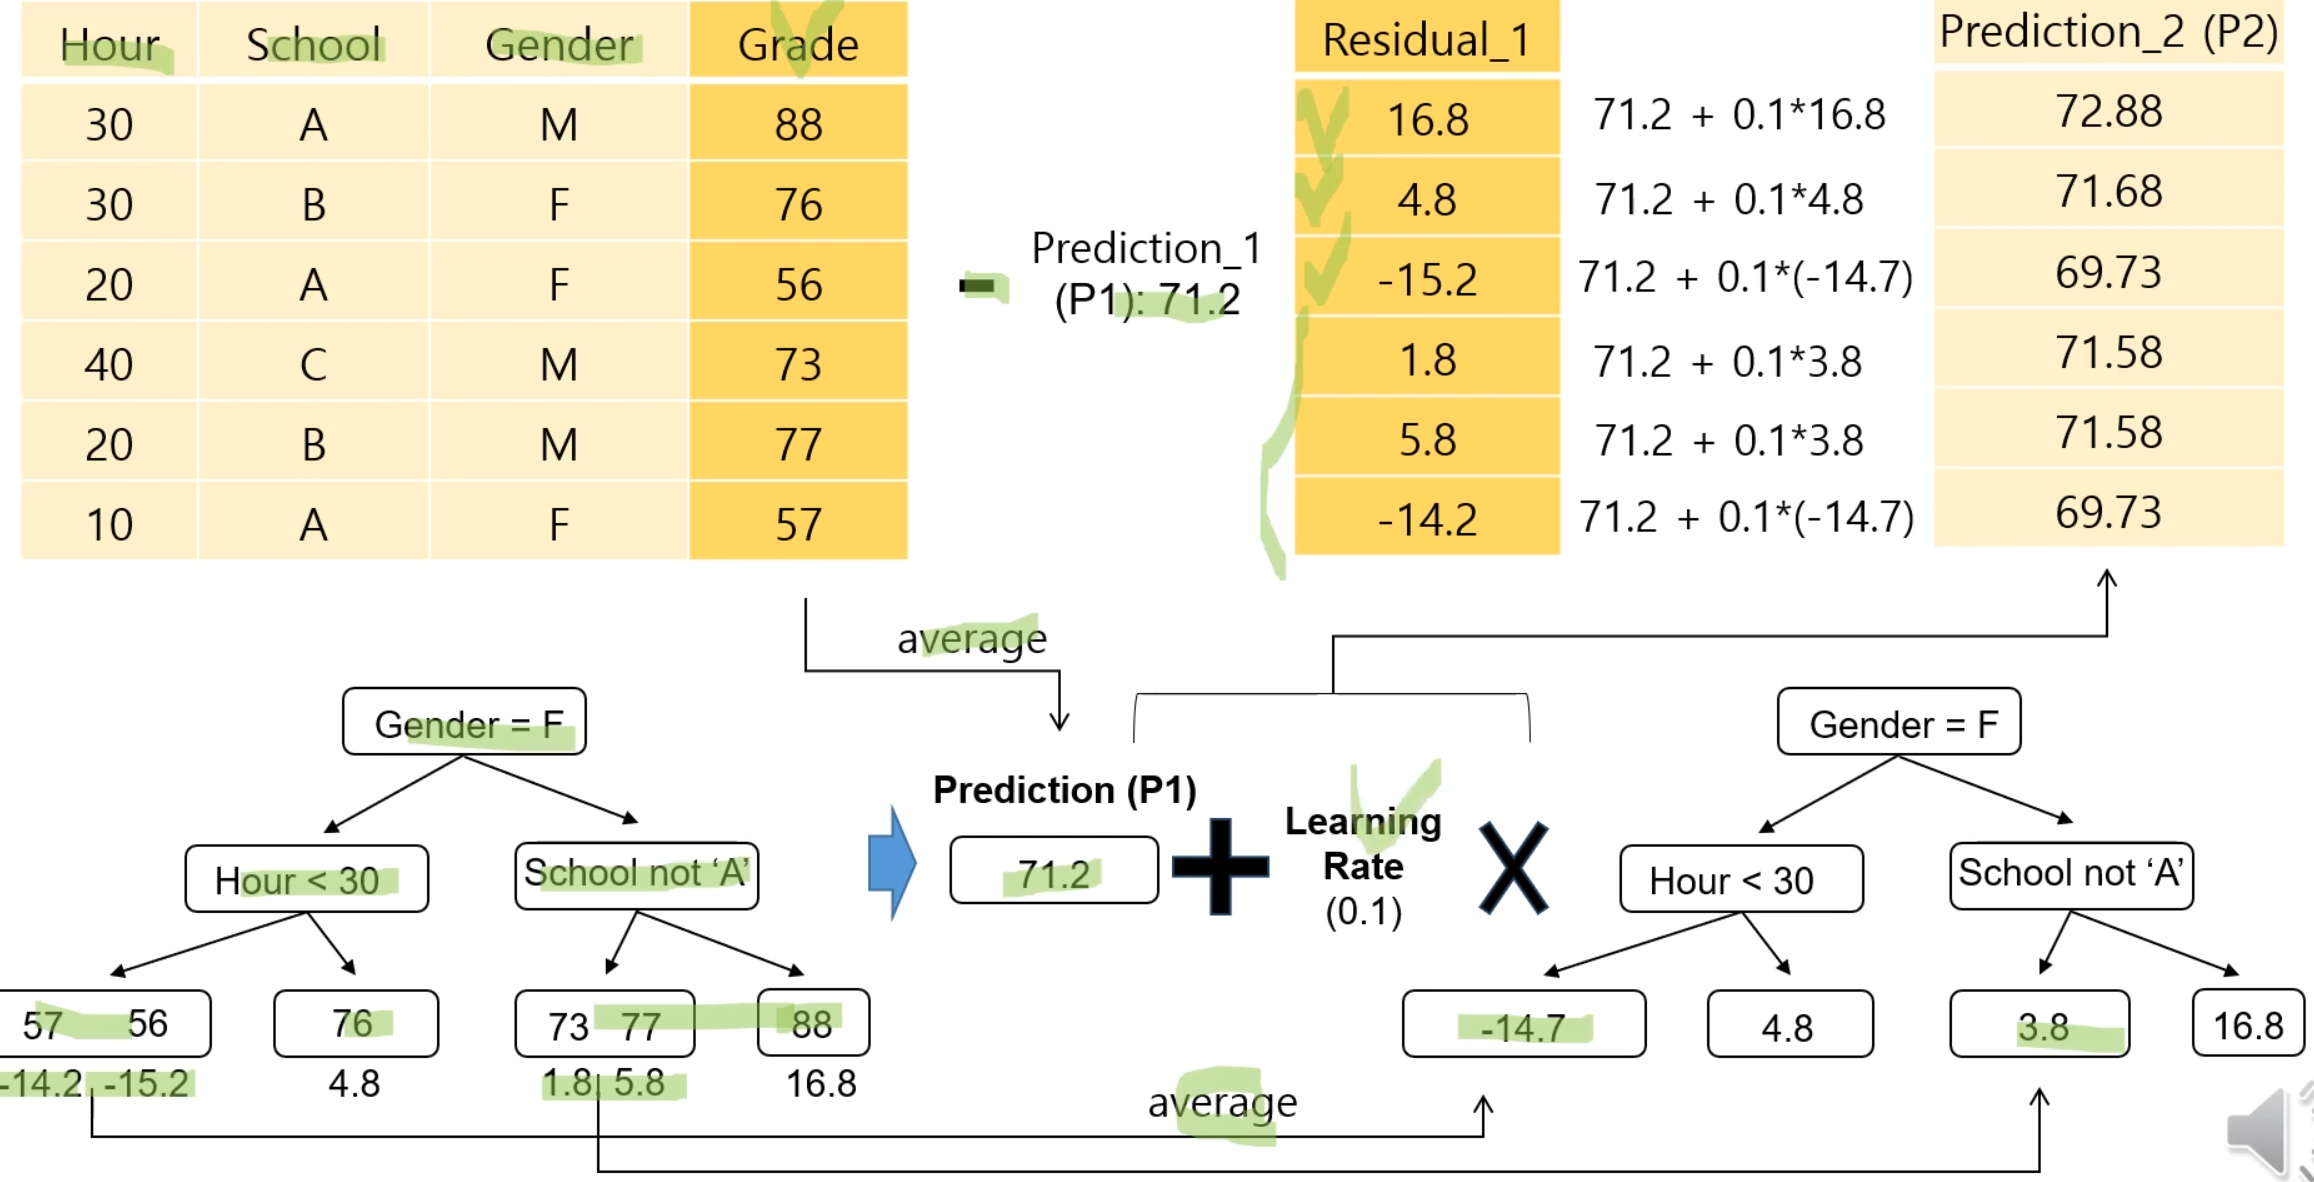

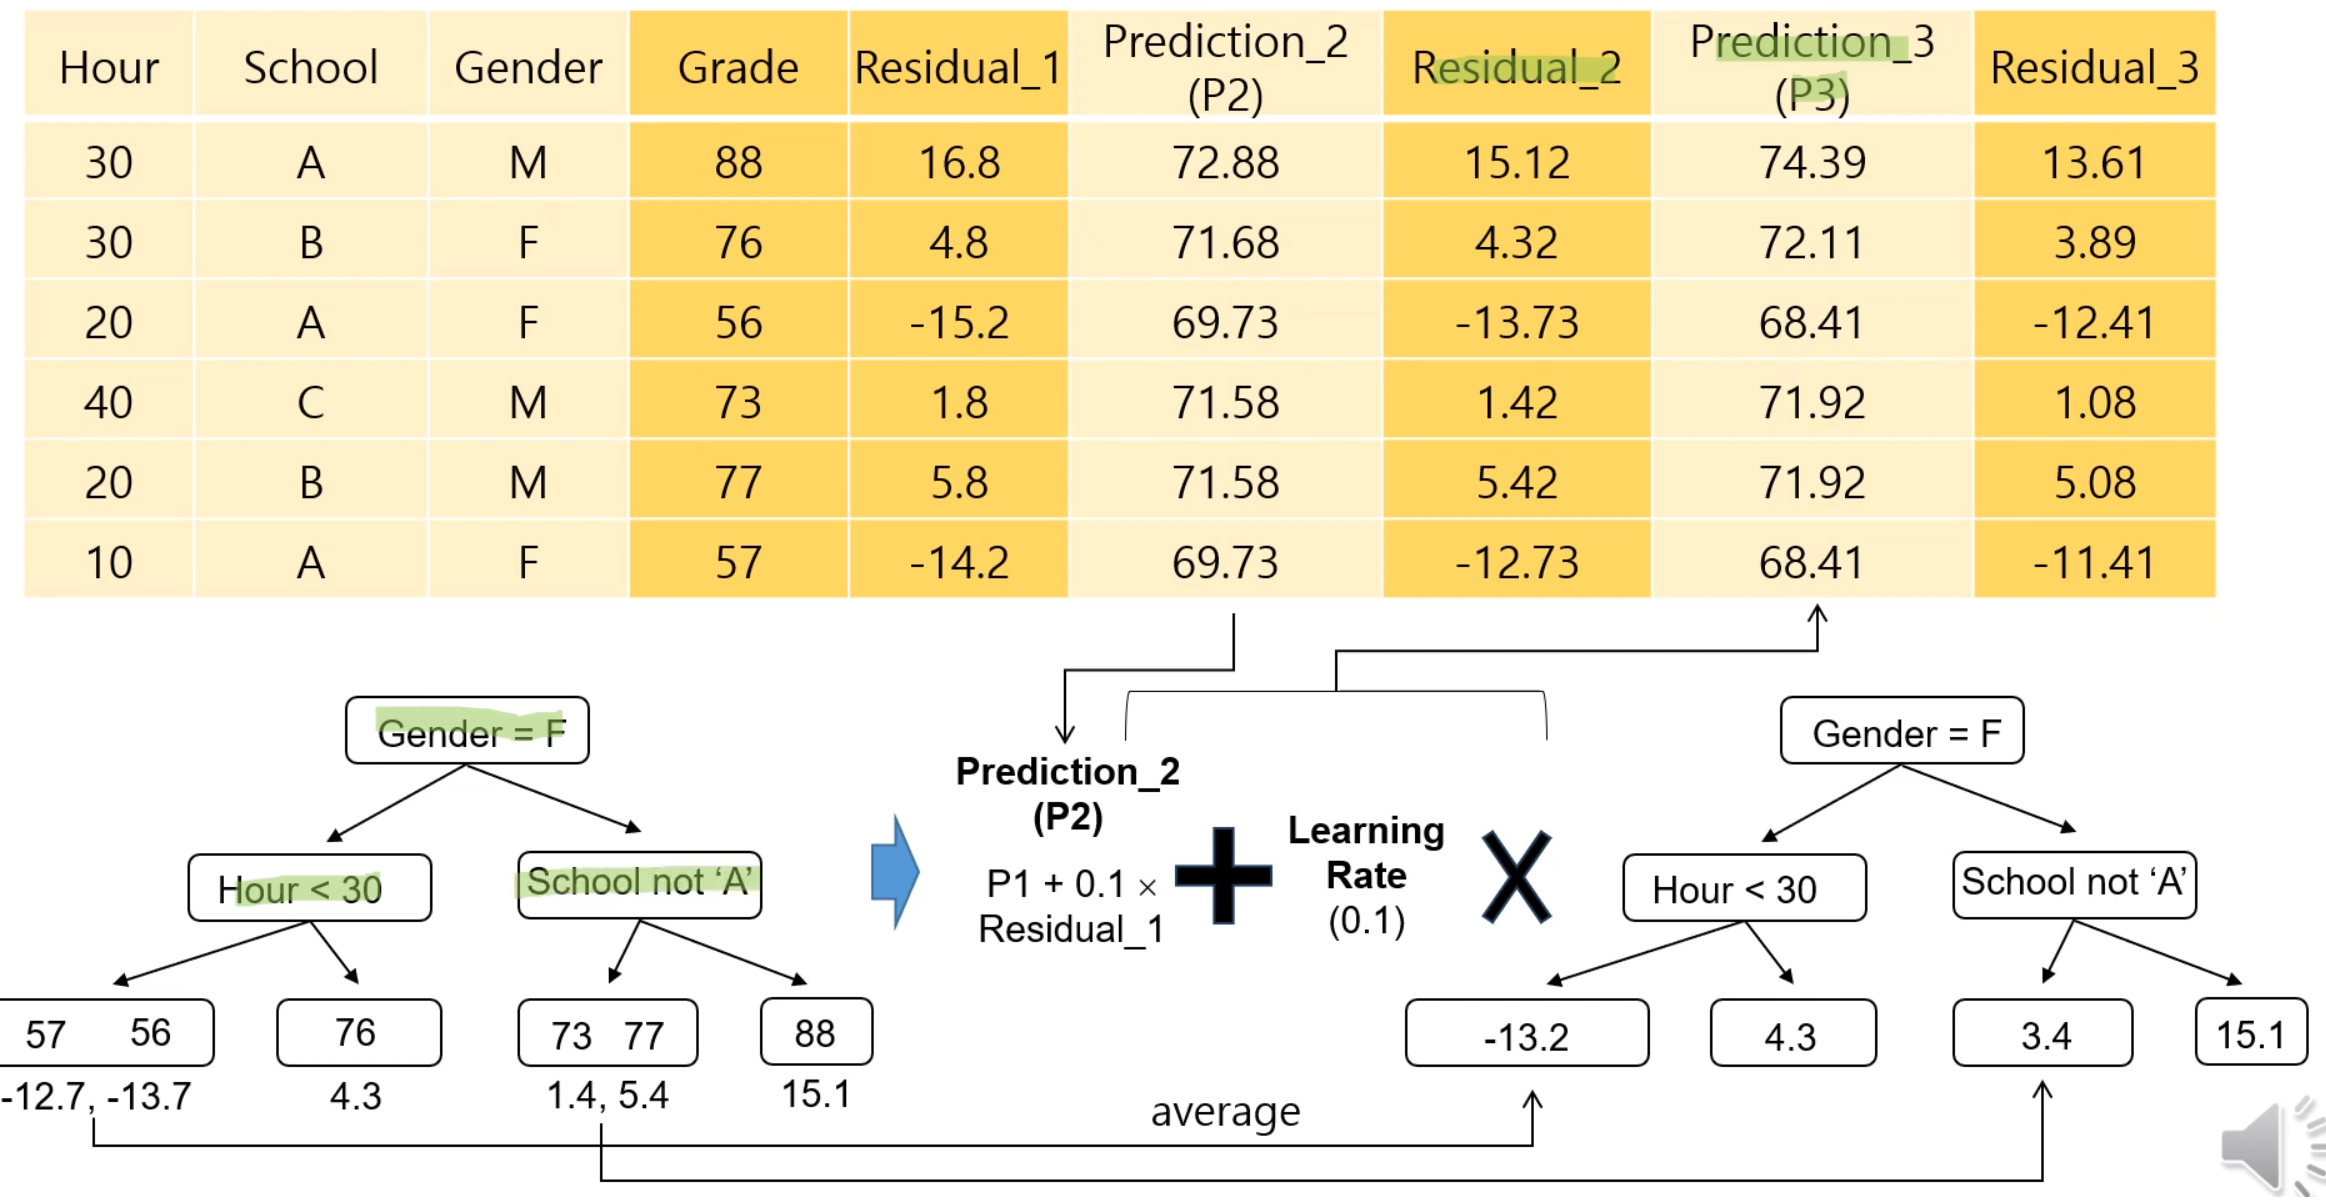

잔차가 스텝을 거듭할 수록 줄어드는 것을 알 수 있다.

### - 실습

In [12]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# GBM 모델 생성
model = GradientBoostingClassifier(
    loss='log_loss', # 'log_loss', 'exponential'
    learning_rate=0.1, # 스텝 사이즈
    n_estimators=100, # 반복수 또는 base-estimator 개수
    subsample=1.0,
    criterion='squared_error', # 개별 트리의 불순도 측도
    max_depth=3,# 최대 깊이
    min_samples_leaf=5, # 개별 트리 최소 끝마디 샘플 수
)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)
print('정확도 : ', model.score(X_train, y_train))

# 성능 평가
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

정확도 :  1.0
Accuracy: 97.78%
